In [1]:
import matplotlib.pyplot as plt
import keras
keras.__version__

Using TensorFlow backend.


'2.1.5'

In [2]:
from keras.datasets import mnist

mnist.load_data() return touple icluded tow touple : train image and lable , test image and lable. It include 60,000 image in 28 * 28 pixel for train and 10,000 image for test

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images.shape

(60000, 28, 28)

2

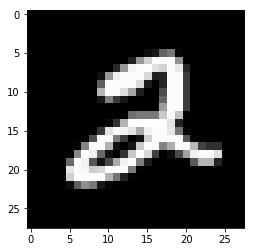

In [6]:
plt.imshow(train_images[5], cmap='gray')
train_labels[5]

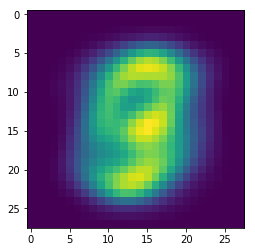

In [7]:
plt.imshow(train_images.mean(axis=0))

To convert from 2 dimention matrix to one vector we use reshape command
Then we convert their value to flot type between 0 to 1 (normalizaion)

In [8]:
train_images = train_images.reshape(train_images.shape[0],28*28)
test_images = test_images.reshape(test_images.shape[0],28*28)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [9]:
train_images.shape

(60000, 784)

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

here we fit our model with sklearn object (set some prameter like 'loss'), by giving it train data

In [11]:
%%time

clf = SGDClassifier(loss='log')
clf.fit(train_images, train_labels)

/usr/lib64/python3.4/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


CPU times: user 9.14 s, sys: 129 ms, total: 9.27 s
Wall time: 12.3 s


testing the accuracy

In [12]:
accuracy_score(train_labels, clf.predict(train_images))

0.9055666666666666

In [13]:
accuracy_score(test_labels, clf.predict(test_images))

0.9021

In [14]:
from keras import models
from keras import layers

define sequential network and add layers to that

In [15]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

here we set some parameter for our networks

In [16]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

to create vector from our lables

In [17]:
from keras.utils import to_categorical

In [18]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels now is vector, first row means number five, becuase sixt element is 1 vice other elements

In [19]:
train_labels[:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [20]:
%%time

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 30s 499us/step - loss: 0.2769 - acc: 0.9196
Epoch 2/5
60000/60000 [==============================] - 17s 288us/step - loss: 0.1291 - acc: 0.9621
Epoch 3/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.0909 - acc: 0.9728
Epoch 4/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.0729 - acc: 0.9775
Epoch 5/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.0604 - acc: 0.9819
CPU times: user 38.8 s, sys: 6.64 s, total: 45.5 s
Wall time: 1min 33s


test accuracy on Test data

In [21]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 238us/step


[0.08434223125125281, 0.9744]